In [1]:
import pandas as pd

In [2]:
#loading data
crop = pd.read_csv(r'C:\Users\91984\Downloads\Crop_recommendation.csv')
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#Normalization using polynomial features
from sklearn.preprocessing import PolynomialFeatures
data = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']
scaler = PolynomialFeatures()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.00000000e+00 9.00000000e+01 4.20000000e+01 ... 4.22888177e+01
  1.31968681e+03 4.11828319e+04]
 [1.00000000e+00 8.50000000e+01 5.80000000e+01 ... 4.95348004e+01
  1.59522351e+03 5.13727326e+04]
 [1.00000000e+00 6.00000000e+01 5.50000000e+01 ... 6.14688481e+01
  2.06953438e+03 6.96771240e+04]
 ...
 [1.00000000e+00 1.18000000e+02 3.30000000e+01 ... 4.04827787e+01
  1.10278525e+03 3.00408064e+04]
 [1.00000000e+00 1.17000000e+02 3.20000000e+01 ... 4.56812768e+01
  8.59551422e+02 1.61735551e+04]
 [1.00000000e+00 1.04000000e+02 1.80000000e+01 ... 4.59661302e+01
  9.55529550e+02 1.98632497e+04]]


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled,target,test_size = 0.2,random_state =2)

In [5]:
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [6]:
#Hyperparameter Tuning
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.97045455, 0.96818182, 0.97272727, 0.96590909, 0.98181818,
       0.975     , 0.97954545, 0.97272727, 0.97727273, 0.97272727,
       0.975     , 0.97045455, 0.97272727, 0.97272727, 0.97045455,
       0.97045455, 0.97272727, 0.97045455, 0.97045455, 0.97045455])

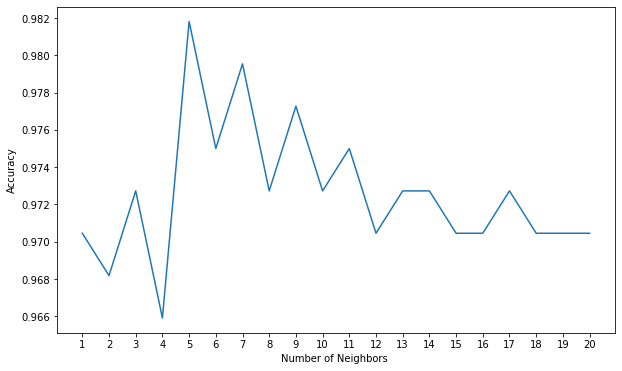

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
#without manhattan
grid_params = { 'n_neighbors' : [3,5,7,9,11,17],
               'metric' : ['minkowski','euclidean'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [10]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=5, n_jobs = -1)

In [11]:
g_res = gs.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    5.7s finished


In [12]:
g_res.best_score_

0.978409090909091

In [13]:
g_res.best_params_

{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5}

In [14]:
# Using the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto',metric = 'minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.9857954545454546
knn_test_accuracy =  0.9818181818181818


In [16]:
#with manhattan
grid_params1 = { 'n_neighbors' : [3,5,7,9,11,17],
               'metric' : ['minkowski','euclidean','manhattan'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [17]:
gs1 = GridSearchCV(KNeighborsClassifier(), grid_params1, verbose = 1, cv=5, n_jobs = -1)

In [18]:
g_res1 = gs1.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    7.3s finished


In [19]:
g_res1.best_score_

0.9846590909090909

In [20]:
g_res1.best_params_

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5}

In [26]:
# Using the best hyperparameters
knn1 = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto',metric = 'manhattan')
knn1.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [27]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn1.score(x_train,y_train)
print("knn_train_accuracy = ",knn1.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn1.score(x_test,y_test)
print("knn_test_accuracy = ",knn1.score(x_test,y_test))

knn_train_accuracy =  0.9903409090909091
knn_test_accuracy =  0.9772727272727273


In [23]:
acc = []
model = []

In [24]:
predicted_values = knn.predict(x_test)

from sklearn.metrics import classification_report

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.89      0.89        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

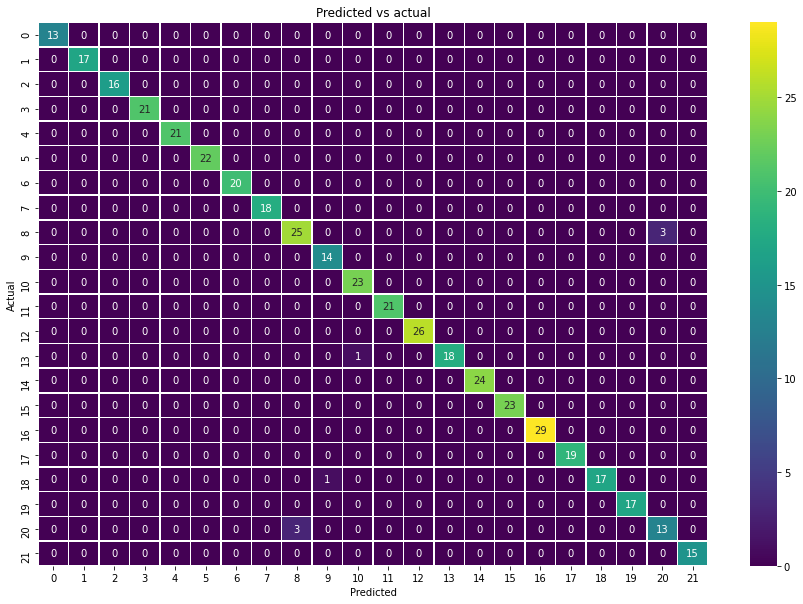

In [25]:
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()